In [1]:
import numpy as np
from PIL import Image

In [2]:
from urllib.request import urlopen 
from io import BytesIO

Загружаем изображение из Интернета

Пусть это будет Lenna :)

In [3]:
req = urlopen("https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png")
img = Image.open(BytesIO(req.read()))

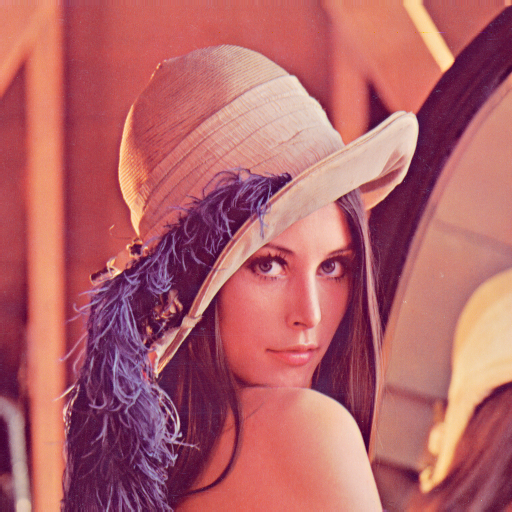

In [4]:
img

Можно также загрузить изображение из файла - это ещё проще:

In [5]:
#img = Image.open("Lenna.png")
#img

Можно преобразовать изображение в массив `numpy`:

In [6]:
data = np.array(img)

In [7]:
data.shape

(512, 512, 3)

In [8]:
data.dtype

dtype('uint8')

Определим функции для преобразования изображения в массив и обратно.

Для удобства предобразуем данные в массиве в `float` лежащий в промежутке `[0.0, 1.0]` 

In [9]:
def from_img(img):
    return np.array(img).astype(np.float64)/255

In [10]:
def to_img(data):
    return Image.fromarray((data.clip(0, 1)*255).astype(np.uint8))

Проверим, что всё работает:

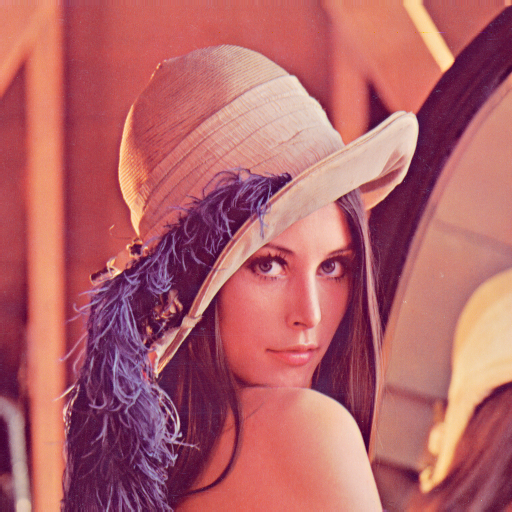

In [11]:
to_img(from_img(img))

### Преобразования картинки

Теперь попробуем каким-нибудь способом изменить массив, и посмотрим, как это поменяет картинку

Инверсия:

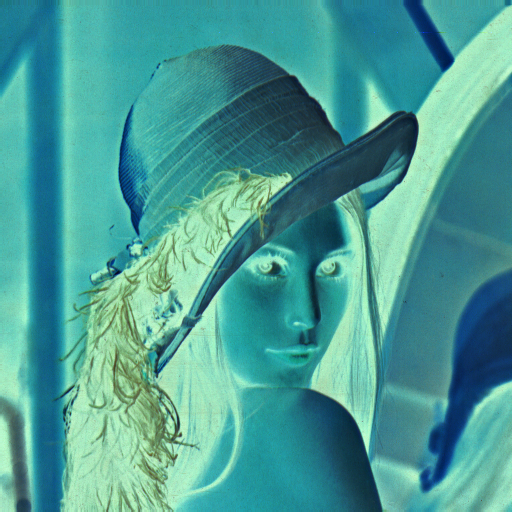

In [12]:
to_img(1.0 - from_img(img))

Яркость:

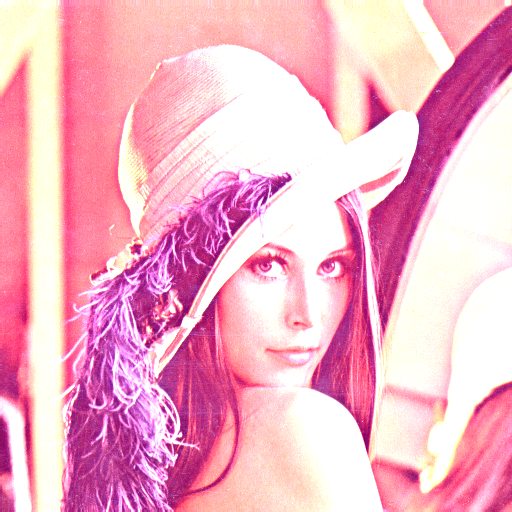

In [13]:
to_img(2.0*from_img(img))

Контраст:

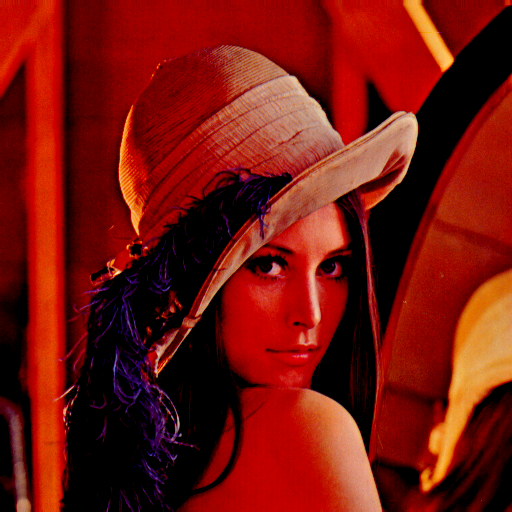

In [14]:
to_img(2.0*from_img(img) - 1.0)

Подобласть:

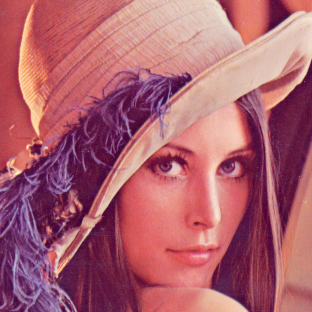

In [15]:
t = from_img(img)
s = t[100:-100,100:-100]
to_img(s)

Изменение подобласти:

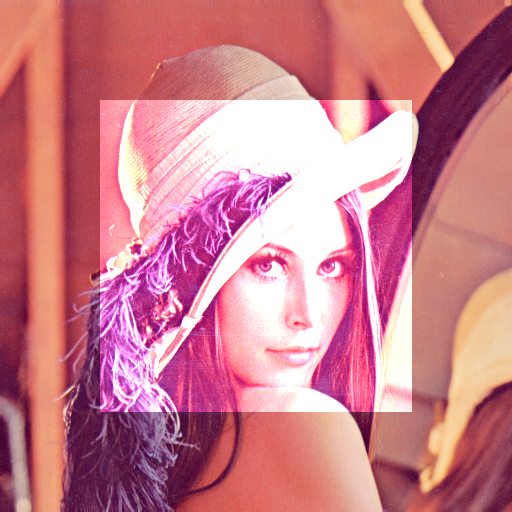

In [16]:
t = from_img(img)
s = t[100:-100,100:-100]
s *= 2.0
to_img(t)

Оставляем только зелёную компоненту:

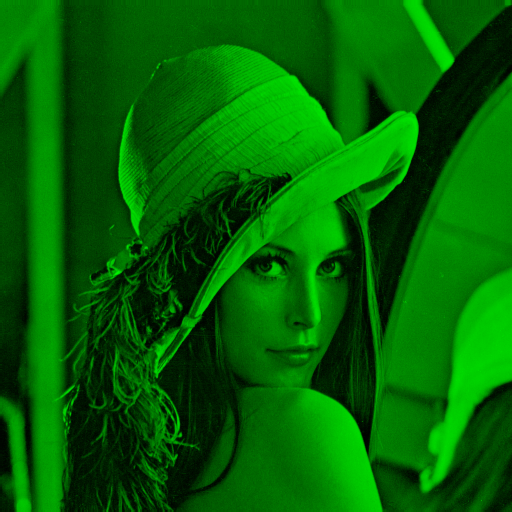

In [17]:
t = from_img(img)
t[:,:,(0,2)] = 0
to_img(t)

Оставляем только зелёную и синюю компоненту:

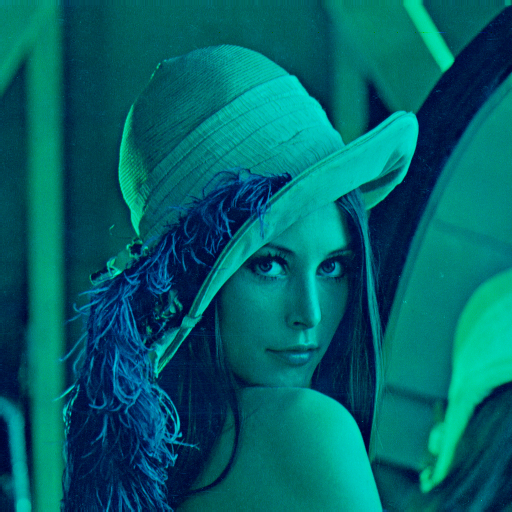

In [18]:
t = from_img(img)
t[:,:,0] = 0
to_img(t)

Черно-белая:

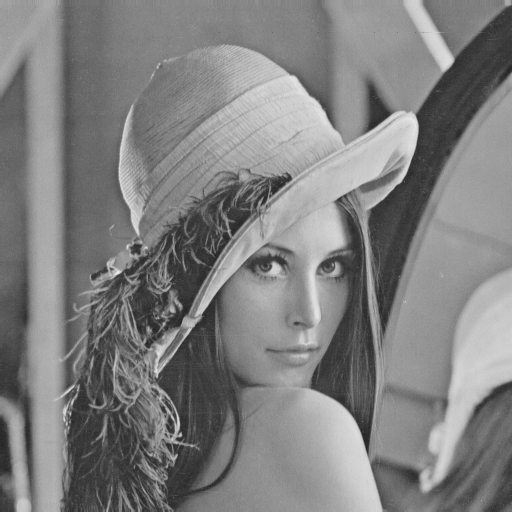

In [19]:
t = from_img(img)
s = t.sum(axis=2)/3
to_img(s)

### Более сложное преобразование - свёрточный фильтр

In [20]:
def conv(src, k):
    dst = np.zeros((src.shape[0] - k.shape[0], src.shape[1] - k.shape[1], src.shape[2]), dtype=np.float64)
    for i in range(k.shape[0]):
        for j in range(k.shape[1]):
            dst += k[i,j]*src[i:-(k.shape[0]-i), j:-(k.shape[0]-j),:]
    return dst

Размытие:

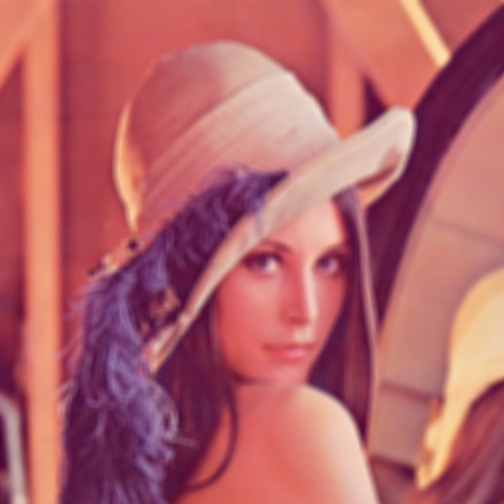

In [21]:
to_img(conv(from_img(img), np.ones((8,8))/64))

Размытие в движении:

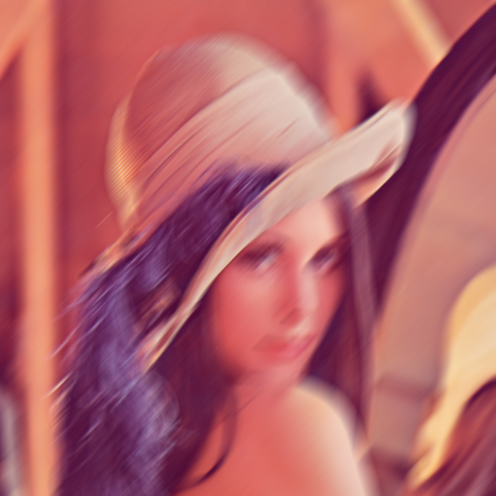

In [22]:
to_img(conv(from_img(img), np.flip(np.eye(16), axis=0)/16))

Повышение резкости:

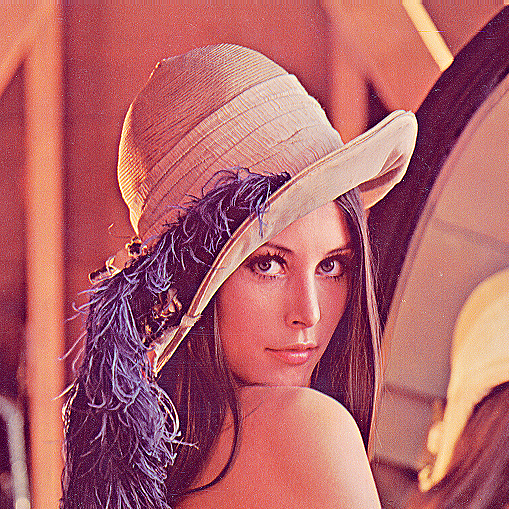

In [23]:
to_img(conv(from_img(img), np.array([
    [ 0,-1, 0],
    [-1, 5,-1],
    [ 0,-1, 0],
])))

Рельеф:

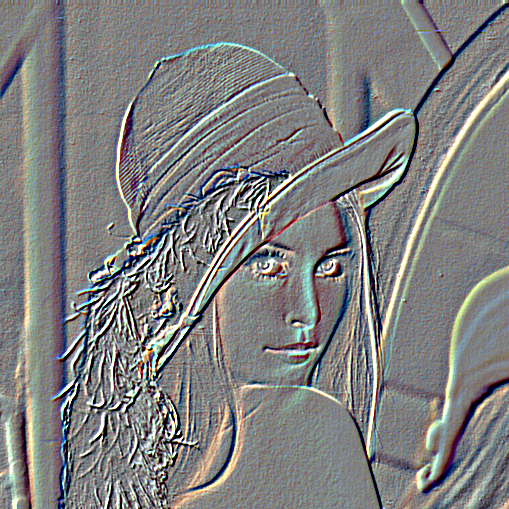

In [24]:
to_img(conv(from_img(img), -np.array([
    [2, 1, 0],
    [1, 0,-1],
    [0,-1,-2],
])) + 0.5)

Выделение границ (фильтр **3**x**3**):

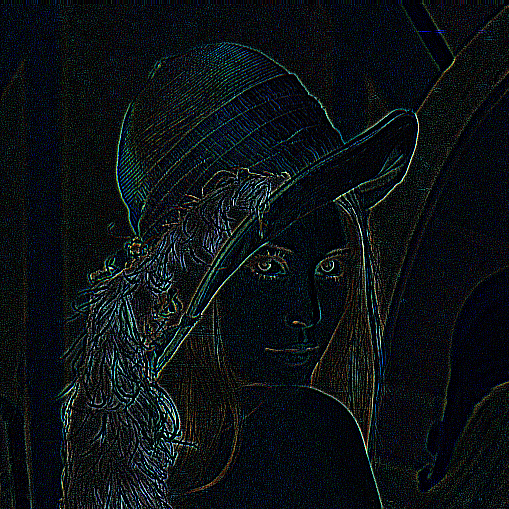

In [25]:
to_img(conv(from_img(img), -np.array([
    [-1,-1,-1],
    [-1, 8,-1],
    [-1,-1,-1],
])))

Выделение границ (фильтр **5**x**5**):

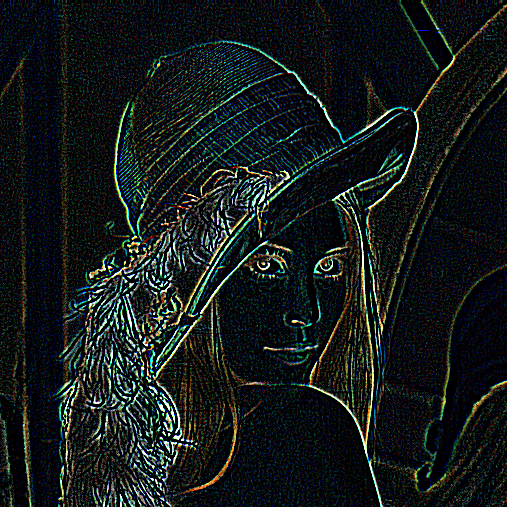

In [26]:
to_img(conv(from_img(img), -0.5*np.array([
    [-1,-1,-1,-1,-1],
    [-1, 0, 0, 0,-1],
    [-1, 0,16, 0,-1],
    [-1, 0, 0, 0,-1],
    [-1,-1,-1,-1,-1],
])))